In [1]:
import tensorflow as tf
import numpy as np
import cv2

In [20]:
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=.2,
    height_shift_range=.2,
    brightness_range=(-.2, .2),
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1/255.0
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=.2,
    height_shift_range=.2,
    brightness_range=(-.2, .2),
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1/255.0
)

In [21]:
training_gen = training_datagen.flow_from_directory(
                    '../webscrap/x',
                    target_size=(224,224),
                    batch_size=32,
                    class_mode='categorical',
                    shuffle=True
                )
validation_gen = validation_datagen.flow_from_directory(
                    '../preprocessing/leaves/test',
                    target_size=(224,224),
                    batch_size=32,
                    class_mode='categorical',
                    shuffle=True    
                )

Found 734 images belonging to 9 classes.
Found 3090 images belonging to 185 classes.


In [22]:
training_gen.num_classes

9

# Build The Model

In [23]:
finetuning = True
mobilenet = tf.keras.applications.MobileNetV2(
                    input_shape=(224,224,3),
                    include_top=False,
                    weights='imagenet',
)

for layer in mobilenet.layers:
    layer.trainable=finetuning


In [24]:
inputs = mobilenet.inputs
x = mobilenet(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(.5)(x)
outputs = tf.keras.layers.Dense(training_gen.num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [25]:
model.compile(
            optimizer=tf.keras.optimizers.Adam(lr=0.001),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=['accuracy']   
    )

In [26]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1280)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 11529     
Total params: 2,269,513
Trainable params: 2,235,401
Non-trainable params: 34,112
_________________________________________________________________


# Training

In [27]:
EPOCHS = 50

history = model.fit(training_gen,
                    epochs=EPOCHS)

Epoch 1/50
23/23 [==============================] - 8s 354ms/step - loss: 2.2547 - accuracy: 0.2112
Epoch 2/50
23/23 [==============================] - 8s 346ms/step - loss: 2.0203 - accuracy: 0.2425
Epoch 3/50
23/23 [==============================] - 8s 343ms/step - loss: 1.9617 - accuracy: 0.2820
Epoch 4/50
23/23 [==============================] - 8s 343ms/step - loss: 1.9069 - accuracy: 0.3120
Epoch 5/50
23/23 [==============================] - 8s 346ms/step - loss: 1.9228 - accuracy: 0.3229
Epoch 6/50
23/23 [==============================] - 8s 344ms/step - loss: 1.7886 - accuracy: 0.3433
Epoch 7/50
23/23 [==============================] - 8s 347ms/step - loss: 1.8188 - accuracy: 0.3229
Epoch 8/50
23/23 [==============================] - 8s 344ms/step - loss: 1.8540 - accuracy: 0.3392
Epoch 9/50
23/23 [==============================] - 8s 346ms/step - loss: 1.6944 - accuracy: 0.3815
Epoch 10/50
23/23 [==============================] - 8s 344ms/step - loss: 1.8040 - accuracy: 0.3202

# Evaluate

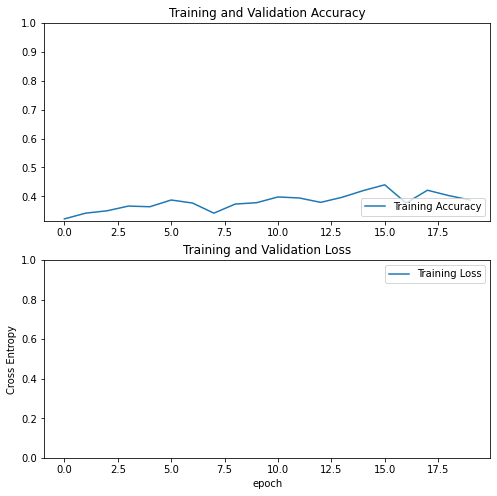

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
# plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
